In [1]:
import time
import random
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.pyplot import ion
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.base import RegressorMixin
from tensorflow.python import training
#%matplotlib inline
#%matplotlib notebook
import os 
import gc
import online_federated_network as ofn


Primeiros experimentos com o online learning. A ideia é tomar inicialmente 300 medidas e prosseguri shiftando a janela a de uma feature a cada rodada e proceder a previsão 5 Acks a frente. O resultado melhorou com 100 epocas. Vamos fazer com 300

##################Round  0  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780
304
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (270, 30, 4)
9/9 [==============================] - 2s 74ms/step
[[0.5610036  0.56395495 0.5582904  0.5646619  0.5633531 ]
 [0.5548584  0.55756927 0.5526701  0.5584235  0.55717313]
 [0.55420715 0.5566206  0.552422   0.5575842  0.5563792 ]
 ...
 [0.4012945  0.40177143 0.40058756 0.4007061  0.40108925]
 [0.40185884 0.40232018 0.40114528 0.40126055 0.40165725]
 [0.40281397 0.40327016 0.4020866  0.4022158  0.40261185]]
##################Round  1  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
304
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:

ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (270, 30, 4)
9/9 [==============================] - 2s 82ms/step
[[0.61179024 0.6116071  0.6115841  0.61166865 0.61168617]
 [0.61781764 0.6177888  0.6178356  0.61774015 0.61781764]
 [0.6185555  0.6185503  0.61860675 0.6184846  0.6185716 ]
 ...
 [0.01335182 0.0136094  0.01367378 0.01336826 0.01344617]
 [0.01386866 0.01414199 0.01419385 0.01387847 0.01395393]
 [0.01456939 0.01486377 0.01490643 0.01457289 0.01464775]]
##################Round  12  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
304
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (270, 30, 4)
9/9 [==============================] - 2s 75ms/step
[[0.618234   0.6181701  0.6181938  0.618

ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (270, 30, 4)
9/9 [==============================] - 2s 84ms/step
[[0.62039936 0.6203993  0.6203993  0.6203993  0.6203993 ]
 [0.6195115  0.6195114  0.61951137 0.6195115  0.6195114 ]
 [0.6187091  0.618709   0.618709   0.6187091  0.618709  ]
 ...
 [0.01355296 0.01355289 0.01355292 0.01355294 0.01355299]
 [0.01351614 0.01351609 0.0135161  0.01351613 0.01351617]
 [0.01350302 0.01350296 0.01350299 0.01350301 0.01350305]]
##################Round  23  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
304
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (270, 30, 4)
9/9 [==============================] - 3s 84ms/step
[[0.6228485  0.6228485  0.6228485  0.622

ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (270, 30, 4)
9/9 [==============================] - 2s 89ms/step
[[0.6057783  0.60577834 0.60577834 0.60577834 0.60577834]
 [0.6004026  0.6004026  0.6004026  0.6004026  0.6004026 ]
 [0.5931208  0.5931208  0.5931208  0.5931208  0.5931208 ]
 ...
 [0.0117593  0.0117593  0.0117593  0.0117593  0.0117593 ]
 [0.01163343 0.01163343 0.01163342 0.01163342 0.01163343]
 [0.06938177 0.06938176 0.06938176 0.06938176 0.06938177]]
##################Round  34  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
304
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (270, 30, 4)
9/9 [==============================] - 3s 126ms/step
[[0.5961834  0.5961834  0.5961835  0.59

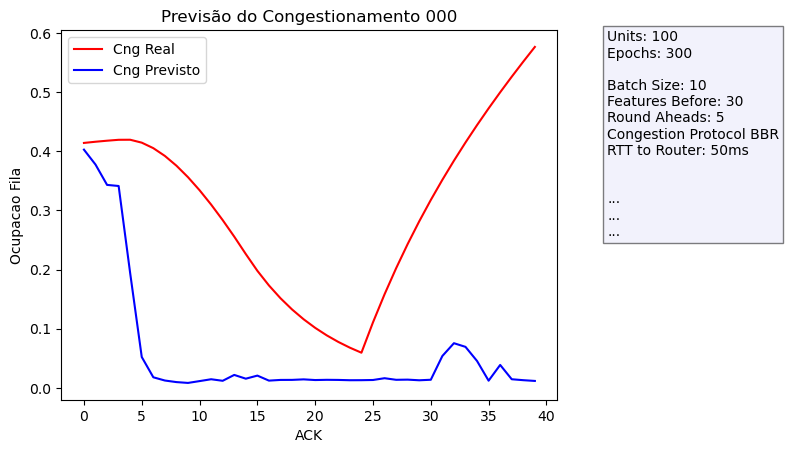

'./Exp_0000016/Thu_Jun__1_20_24_05_2023'

In [12]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila.\n"
description =description + "Modelo com 300 épocas em cada round\n"
description = description+ "Verificando a aderencia sobre um dos modelos concatenados\n"
description = description+ "Dados que não participaram do treinamento, mas gerados na mesma rede.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"
exp_dir = "./Exp_0000016/"
GeneralTraining(parExpDir="./Exp_0000016/",
                parPreviousTrainingExpDir=exp_dir,
                parTrainingPath="./Exp_0000016/training_client01.csv",
                parTestPath="./Exp_0000016/test_client01.csv",
                parExpDescription=description,
                parSequencialTraining=False)


Ainda não ficou bom. Vamos, levando-se em consideração que quando se treina com o conjunto todos de dados, a coisa fica perfeita, vamos aumentar o tamanho da janela deslizante para 50*T = 1500 e utilzar 100 épocas e 40 deslizamentos

##################Round  0  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780
1504
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (1470, 30, 4)
46/46 [==============================] - 3s 25ms/step
[[0.67810994 0.6801868  0.68613696 0.6574577  0.6789629 ]
 [0.67196    0.6795391  0.67694813 0.65112203 0.6659125 ]
 [0.6685613  0.6795508  0.67105    0.6476584  0.65568453]
 ...
 [0.77110296 0.75867283 0.7598285  0.7519657  0.7584982 ]
 [0.77638876 0.7591228  0.76199794 0.7522825  0.7619142 ]
 [0.77134746 0.7486321  0.74810493 0.73768675 0.751118  ]]
##################Round  1  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
1504
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normal

ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (1470, 30, 4)
46/46 [==============================] - 4s 52ms/step
[[0.08694497 0.08606557 0.08549005 0.08498162 0.08530498]
 [0.5631814  0.56228286 0.56277496 0.56363493 0.5632436 ]
 [0.57087773 0.5700933  0.57042325 0.57127535 0.5709559 ]
 ...
 [0.0660869  0.06545918 0.06582448 0.06384817 0.06530378]
 [0.0657159  0.06503146 0.06535948 0.06337523 0.06482551]
 [0.06826346 0.06747261 0.06774423 0.06561126 0.06718025]]
##################Round  12  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
1504
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (1470, 30, 4)
46/46 [==============================] - 4s 58ms/step
[[0.6112256  0.6108327  0.6106721

ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (1470, 30, 4)
46/46 [==============================] - 4s 63ms/step
[[0.6239135  0.6239485  0.6239106  0.6239074  0.62394273]
 [0.62286466 0.62290084 0.62285906 0.62285936 0.6228912 ]
 [0.62404037 0.6240774  0.6240347  0.6240345  0.6240678 ]
 ...
 [0.01860949 0.01853179 0.01857564 0.01873149 0.01865519]
 [0.02273398 0.02263921 0.02270306 0.0228862  0.02278572]
 [0.03132518 0.03120216 0.03129954 0.03153691 0.03139466]]
##################Round  23  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
1504
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (1470, 30, 4)
46/46 [==============================] - 4s 50ms/step
[[0.629804   0.6297836  0.6297819

ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (1470, 30, 4)
46/46 [==============================] - 4s 67ms/step
[[0.59975183 0.5997493  0.59975207 0.5997498  0.59975237]
 [0.59496987 0.59496593 0.59496987 0.59496796 0.59497094]
 [0.5896013  0.58959633 0.5896013  0.58959943 0.5896028 ]
 ...
 [0.02103841 0.02103392 0.02103999 0.02104316 0.02104289]
 [0.0212333  0.02122851 0.02123511 0.02123785 0.02123724]
 [0.02488782 0.02488276 0.02489005 0.02489256 0.02489153]]
##################Round  34  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
1504
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (1470, 30, 4)
46/46 [==============================] - 5s 62ms/step
[[0.60971904 0.6097184  0.6097178

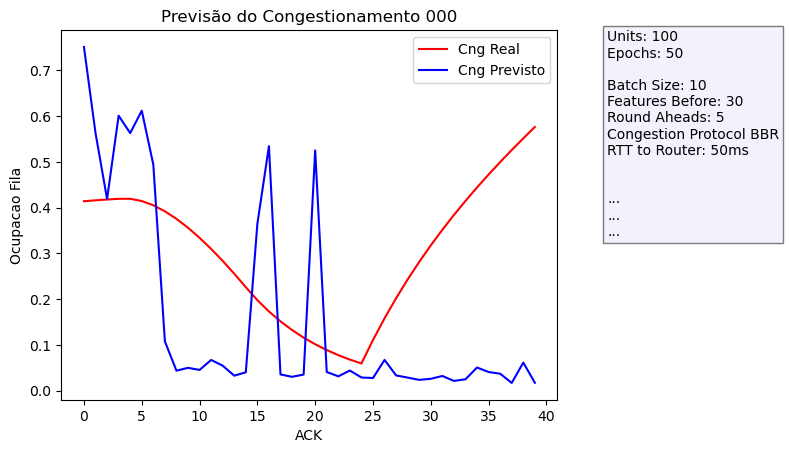

'./Exp_0000016/Fri_Jun__2_16_01_58_2023'

In [4]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila.\n"
description =description + "Modelo com 100 épocas em cada round\n"
description = description+ "Dados que participaram do treinamento por partes, e dados de treino como os da janela deslizante.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"
exp_dir = "./Exp_0000016/"
GeneralTraining(parExpDir="./Exp_0000016/",
                parPreviousTrainingExpDir=exp_dir,
                parTrainingPath="./Exp_0000016/training_client01.csv",
                parTestPath="./Exp_0000016/test_client01.csv",
                parExpDescription=description,
                parSequencialTraining=False)

Pelos resultados preliminares, já parece q não vai ficar bom. Ainda tentando aproximar do treinamento tradicional, sem janela deslizante, vamos fazer o deslocamento só na calda, mantendo toda a série na mesma sequencia. O experimento abaixo foi realizado com 50 épocas a cada round.

##################Round  0  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780
304
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (267, 30, 4)
9/9 [==============================] - 3s 20ms/step
[[0.623397   0.61470777 0.6113861  0.62406236 0.620228  ]
 [0.6109568  0.6024339  0.5991051  0.6119108  0.6078439 ]
 [0.6000158  0.59193045 0.5885815  0.60128886 0.59712607]
 ...
 [0.37100092 0.36607993 0.36487195 0.36475176 0.371117  ]
 [0.37141183 0.3664726  0.36524758 0.36515152 0.37151656]
 [0.37251934 0.36759922 0.36633477 0.36624536 0.37263018]]
##################Round  1  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
305
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:

ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
315
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (278, 30, 4)
9/9 [==============================] - 2s 49ms/step
[[0.5652822  0.56561697 0.562453   0.5646534  0.56476206]
 [0.56686306 0.56727344 0.56454176 0.5664676  0.5665012 ]
 [0.5689325  0.56937236 0.56706655 0.56872874 0.5686969 ]
 ...
 [0.40152457 0.40151194 0.4014705  0.40171948 0.4015122 ]
 [0.402171   0.4021416  0.40209678 0.40236497 0.40214476]
 [0.40282562 0.40277886 0.40273076 0.40301824 0.4027853 ]]
##################Round  12  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
316
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os test

ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (289, 30, 4)
10/10 [==============================] - 3s 50ms/step
[[0.561248   0.5604284  0.55920374 0.5607146  0.56028455]
 [0.56007844 0.5595254  0.55834115 0.55967665 0.559322  ]
 [0.5605311  0.560204   0.5590735  0.5602625  0.5599743 ]
 ...
 [0.19789079 0.19817184 0.19941588 0.20110938 0.19838184]
 [0.19603592 0.1963167  0.19757666 0.19928667 0.1965058 ]
 [0.19439098 0.19467184 0.19594663 0.19766998 0.19484155]]
##################Round  23  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
327
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (290, 30, 4)
10/10 [==============================] - 3s 50ms/step
[[0.55310833 0.5532574  0.552859   0

ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (300, 30, 4)
10/10 [==============================] - 3s 61ms/step
[[0.5484298  0.5482826  0.5484241  0.54814225 0.54826295]
 [0.5508819  0.5507743  0.5509038  0.55062634 0.55077153]
 [0.5541592  0.55408263 0.55420184 0.5539334  0.5540819 ]
 ...
 [0.16123037 0.16190292 0.1615631  0.1607421  0.16054353]
 [0.16289662 0.16361625 0.16325581 0.16235933 0.16222368]
 [0.16465849 0.16542202 0.16503768 0.16406983 0.16399795]]
##################Round  34  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
338
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (301, 30, 4)
10/10 [==============================] - 3s 60ms/step
[[0.55541635 0.55548924 0.55566305 0

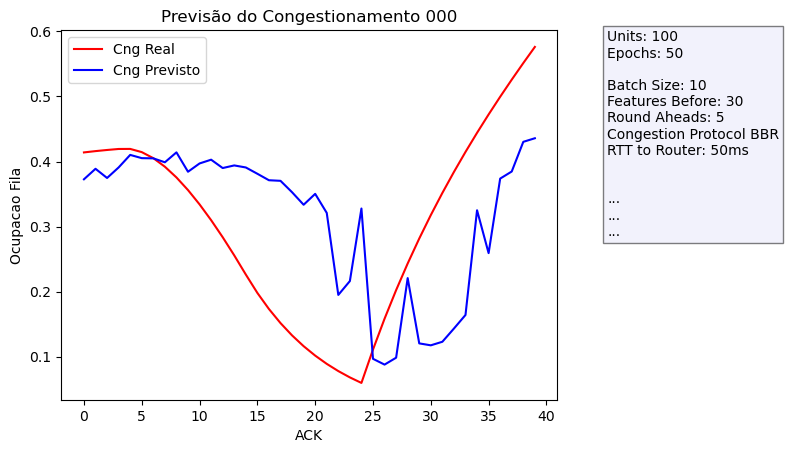

'./Exp_0000016/Mon_Jun__5_15_01_46_2023'

In [3]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila.\n"
description =description + "Modelo com 50 épocas em cada round\n"
description = description+ "Dados que participaram do treinamento por partes, e dados de treino como os da janela deslizante **sequencial**.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"
exp_dir = "./Exp_0000016/"
ofn.GeneralTraining(parExpDir="./Exp_0000016/",
                parPreviousTrainingExpDir=exp_dir,
                parTrainingPath="./Exp_0000016/training_client01.csv",
                parTestPath="./Exp_0000016/test_client01.csv",
                parExpDescription=description,
                parSequencialTraining=False)

Resultado acima ficou muito bom!!! Vamos ver se melhora seguindo a sugestão do professor de colocar a média móvel 90/10 e 50 épocas a cada round, manendo a janela deslizante sequencial. Houve um erro no experimento abaixo, que foi realizado com uma média móvel 10/90, ou seja 10% do atual e 90 do novo. Mesmo assim ficou bom!

##################Round  0  ##################################
ack_ewma_normalizer:  3915.1
send_ewma:  4096.8
rtt_ratio_normalizer:  10.679487179487179
cwnd (Bytes):  159140
304
ack_ewma_normalizer:  3915.1
send_ewma:  4096.8
rtt_ratio_normalizer:  10.679487179487179
cwnd (Bytes):  159140.0
Observe os testadores
shape:  (267, 30, 4)
9/9 [==============================] - 3s 69ms/step
[[0.37863803 0.38020426 0.36925942 0.37513357 0.38009658]
 [0.40538743 0.40817252 0.39671114 0.40782169 0.41170445]
 [0.44516623 0.45053184 0.43811423 0.45549834 0.45817032]
 ...
 [0.93532443 0.9440314  0.94279754 0.9309826  0.9319773 ]
 [0.9353023  0.9445856  0.9431647  0.9313708  0.93224794]
 [0.9395025  0.9487993  0.94606125 0.9349435  0.935857  ]]
##################Round  1  ##################################
ack_ewma_normalizer:  3915.1
send_ewma:  4096.8
rtt_ratio_normalizer:  10.679487179487179
cwnd (Bytes):  159140.0
305
ack_ewma_normalizer:  3915.1
send_ewma:  4096.8
rtt_ratio_normalizer:  10.679

ack_ewma_normalizer:  3915.1
send_ewma:  4096.8
rtt_ratio_normalizer:  10.679487179487179
cwnd (Bytes):  159140.0
Observe os testadores
shape:  (278, 30, 4)
9/9 [==============================] - 3s 70ms/step
[[0.00873102 0.00925008 0.00881574 0.00849541 0.00910524]
 [0.00549664 0.00558871 0.00571318 0.00569664 0.00523157]
 [0.070909   0.06874163 0.06725407 0.0781953  0.06045458]
 ...
 [0.8574871  0.857895   0.85682654 0.856035   0.8651392 ]
 [0.8564911  0.85556257 0.85578144 0.85408765 0.86500055]
 [0.8546214  0.8531639  0.8534768  0.8517654  0.86299443]]
##################Round  12  ##################################
ack_ewma_normalizer:  3915.1
send_ewma:  4096.8
rtt_ratio_normalizer:  10.679487179487179
cwnd (Bytes):  159140.0
316
ack_ewma_normalizer:  3915.1
send_ewma:  4096.8
rtt_ratio_normalizer:  10.679487179487179
cwnd (Bytes):  159140.0
Observe os testadores
shape:  (279, 30, 4)
9/9 [==============================] - 3s 70ms/step
[[0.01422274 0.01451905 0.01329445 0.0135803  

ack_ewma_normalizer:  3915.1
send_ewma:  4096.8
rtt_ratio_normalizer:  10.679487179487179
cwnd (Bytes):  159140.0
Observe os testadores
shape:  (289, 30, 4)
10/10 [==============================] - 3s 69ms/step
[[6.4991252e-04 6.8413810e-04 7.5294269e-04 8.2223397e-04 9.0245745e-04]
 [4.7126986e-04 5.2136439e-04 5.5437133e-04 6.3453597e-04 6.2150630e-04]
 [5.8020917e-03 5.2446476e-03 5.3546140e-03 5.4533933e-03 4.3462659e-03]
 ...
 [8.6728734e-01 8.6563277e-01 8.6683488e-01 8.6555821e-01 8.6599606e-01]
 [8.6746895e-01 8.6560071e-01 8.6725324e-01 8.6552131e-01 8.6613053e-01]
 [8.6734605e-01 8.6519665e-01 8.6743373e-01 8.6513925e-01 8.6592931e-01]]
##################Round  23  ##################################
ack_ewma_normalizer:  3915.1
send_ewma:  4096.8
rtt_ratio_normalizer:  10.679487179487179
cwnd (Bytes):  159140.0
327
ack_ewma_normalizer:  3915.1
send_ewma:  4096.8
rtt_ratio_normalizer:  10.679487179487179
cwnd (Bytes):  159140.0
Observe os testadores
shape:  (290, 30, 4)
10/10 

ack_ewma_normalizer:  3915.1
send_ewma:  4096.8
rtt_ratio_normalizer:  10.679487179487179
cwnd (Bytes):  159140.0
Observe os testadores
shape:  (300, 30, 4)
10/10 [==============================] - 3s 76ms/step
[[0.00246008 0.00240965 0.0022509  0.00245248 0.00270643]
 [0.00116285 0.00116623 0.00108491 0.00115864 0.00129202]
 [0.0267062  0.0284088  0.02372556 0.02302152 0.02592578]
 ...
 [0.8505908  0.84970003 0.85021365 0.8502454  0.8501208 ]
 [0.8479945  0.8470951  0.84774697 0.8476896  0.84756976]
 [0.8450345  0.84414965 0.84493357 0.8447924  0.84467095]]
##################Round  34  ##################################
ack_ewma_normalizer:  3915.1
send_ewma:  4096.8
rtt_ratio_normalizer:  10.679487179487179
cwnd (Bytes):  159140.0
338
ack_ewma_normalizer:  3915.1
send_ewma:  4096.8
rtt_ratio_normalizer:  10.679487179487179
cwnd (Bytes):  159140.0
Observe os testadores
shape:  (301, 30, 4)
10/10 [==============================] - 3s 76ms/step
[[1.0020431e-03 9.4838679e-04 9.0290466e-0

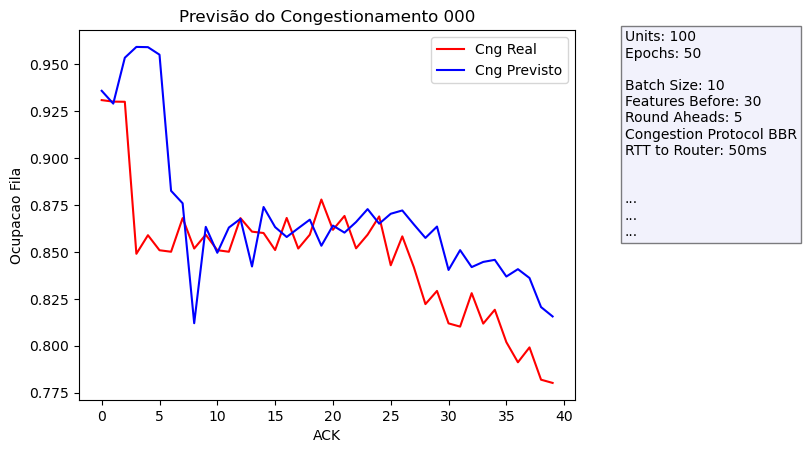

'./Exp_0000021/Mon_Jun__5_17_45_16_2023'

In [4]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila, **com 90/10%.\n"
description =description + "Modelo com 100 épocas em cada round\n"
description = description+ "Dados que participaram do treinamento por partes, e dados de treino como os da janela deslizante **sequencial**.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"
exp_dir = "./Exp_0000021/"
ofn.GeneralTraining(parExpDir="./Exp_0000021/",
                parPreviousTrainingExpDir=exp_dir,
                parTrainingPath="./Exp_0000021/training_client01.csv",
                parTestPath="./Exp_0000021/test_client01.csv",#fake
                parExpDescription=description,
                parSequencialTraining=False)

Agora façamos com dados efetivamente 90/10% e com 100 épocas a cada round.

##################Round  0  ##################################
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660
304
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (267, 30, 4)
9/9 [==============================] - 3s 24ms/step
[[0.46674517 0.46183586 0.46803585 0.47292712 0.46892434]
 [0.4925323  0.48569244 0.4926552  0.4987783  0.49604198]
 [0.5475797  0.5374313  0.5445117  0.551841   0.55209094]
 ...
 [0.944745   0.9504435  0.94989383 0.9490449  0.94568014]
 [0.943038   0.9484714  0.94877553 0.94811326 0.94395727]
 [0.93955636 0.94448304 0.9461668  0.945528   0.93946826]]
##################Round  1  ##################################
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
305
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:

ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (278, 30, 4)
9/9 [==============================] - 2s 47ms/step
[[0.1686293  0.16986209 0.1638142  0.16523357 0.1629773 ]
 [0.3656657  0.3614024  0.35410404 0.35657853 0.34840587]
 [0.5117678  0.5099254  0.50504416 0.5081799  0.4993375 ]
 ...
 [0.9164403  0.9180958  0.9204903  0.91722894 0.92025775]
 [0.91114014 0.91282374 0.91524756 0.91189384 0.9150994 ]
 [0.90884984 0.9105494  0.9130099  0.90960014 0.9129048 ]]
##################Round  12  ##################################
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
316
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (279, 30, 4)
9/9 [==============================] - 2s 53ms/step
[[0.08704416 0.08904982 0.08897959 0.088

ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (289, 30, 4)
10/10 [==============================] - 3s 62ms/step
[[0.0812375  0.08194638 0.08157536 0.08094365 0.08249333]
 [0.07355494 0.07397521 0.07453366 0.07328225 0.07509741]
 [0.06563418 0.06757751 0.06927653 0.06832156 0.07032012]
 ...
 [0.8749952  0.8749669  0.8750992  0.8751031  0.8749366 ]
 [0.87350065 0.8734728  0.87358063 0.8735817  0.87343204]
 [0.8717678  0.87174636 0.8718162  0.87181944 0.87168044]]
##################Round  23  ##################################
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
327
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (290, 30, 4)
10/10 [==============================] - 3s 66ms/step
[[0.08191315 0.08269083 0.0818475  0

ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (300, 30, 4)
10/10 [==============================] - 3s 74ms/step
[[0.08558976 0.08593535 0.0855433  0.08562345 0.08577924]
 [0.08517281 0.08537125 0.08513083 0.08513027 0.08530908]
 [0.10547461 0.10570918 0.10583954 0.10584675 0.10570593]
 ...
 [0.8630728  0.8630955  0.86302924 0.863163   0.8630219 ]
 [0.8608253  0.8608518  0.860781   0.86091375 0.86077434]
 [0.8582004  0.8582295  0.85815394 0.8582869  0.8581485 ]]
##################Round  34  ##################################
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
338
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (301, 30, 4)
10/10 [==============================] - 3s 76ms/step
[[0.09517825 0.09528614 0.09512638 0

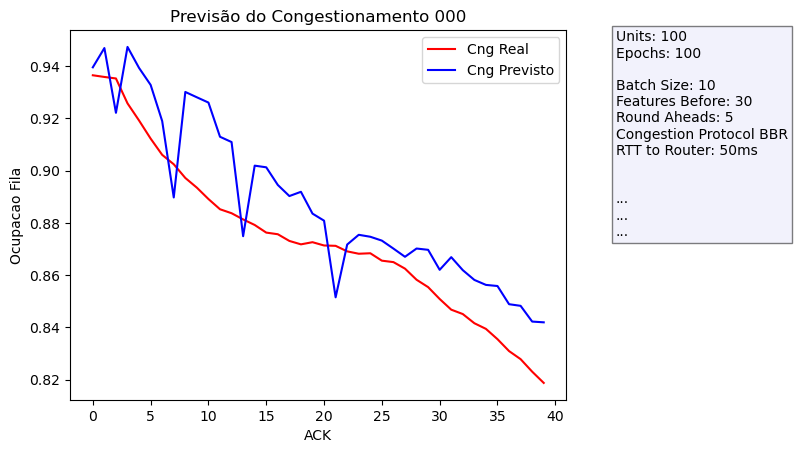

'./Exp_0000022/Tue_Jun__6_08_37_47_2023'

In [2]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila, **com 90/10%.\n"
description =description + "Modelo com 100 épocas em cada round\n"
description = description+ "Dados que participaram do treinamento por partes, e dados de treino como os da janela deslizante **sequencial**.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"
exp_dir = "./Exp_0000022/"
ofn.GeneralTraining(parExpDir="./Exp_0000022/",
                parPreviousTrainingExpDir=exp_dir,
                parTrainingPath="./Exp_0000022/training_client01.csv",
                parTestPath="./Exp_0000022/test_client01.csv",#fake
                parExpDescription=description,
                parSequencialTraining=False)

Os resultados ficaram muito bons. Vamos fazer com mais rounds(100) e ver com fica.

##################Round  0  ##################################
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660
304
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (267, 30, 4)
9/9 [==============================] - 2s 20ms/step
[[0.43084976 0.4226391  0.4323326  0.43343517 0.42339492]
 [0.4733358  0.4649314  0.47531995 0.47613844 0.46392947]
 [0.561232   0.5547355  0.5659387  0.5655073  0.5552381 ]
 ...
 [0.95226526 0.95491207 0.9524823  0.9583208  0.95124227]
 [0.947202   0.9503816  0.9477492  0.95595425 0.94529146]
 [0.9346492  0.93914825 0.93815804 0.940976   0.93479294]]
##################Round  1  ##################################
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
305
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:

ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (278, 30, 4)
9/9 [==============================] - 2s 59ms/step
[[0.1323424  0.13789983 0.13581868 0.13854317 0.13330108]
 [0.11251908 0.11784358 0.11563631 0.11826397 0.11301287]
 [0.10901321 0.11360093 0.11187667 0.11363632 0.10885278]
 ...
 [0.9384251  0.9407644  0.9396432  0.9417703  0.93991506]
 [0.93445414 0.93689066 0.9360025  0.9379887  0.935975  ]
 [0.93159103 0.93408626 0.9332261  0.9351128  0.9330637 ]]
##################Round  12  ##################################
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
316
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (279, 30, 4)
9/9 [==============================] - 3s 68ms/step
[[0.0819939  0.08469031 0.08290032 0.087

ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (289, 30, 4)
10/10 [==============================] - 3s 72ms/step
[[0.08598522 0.08464159 0.08529408 0.0847526  0.08598001]
 [0.09148644 0.08946076 0.09059871 0.09002329 0.09118865]
 [0.07227733 0.06830535 0.07088847 0.07172806 0.07207071]
 ...
 [0.8809409  0.880827   0.8804232  0.88072765 0.8808437 ]
 [0.8798485  0.87972915 0.8793308  0.8796332  0.8797433 ]
 [0.878778   0.8786469  0.878255   0.8785577  0.87865824]]
##################Round  23  ##################################
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
327
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (290, 30, 4)
10/10 [==============================] - 3s 72ms/step
[[0.10453594 0.10247695 0.10307836 0

ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (300, 30, 4)
10/10 [==============================] - 3s 71ms/step
[[0.07826024 0.078269   0.07814956 0.07790705 0.07791667]
 [0.08088019 0.08089011 0.08074629 0.08042728 0.0804585 ]
 [0.08397724 0.08394584 0.0838419  0.0834459  0.08355372]
 ...
 [0.867361   0.867386   0.86732084 0.8672614  0.8672599 ]
 [0.8666506  0.86666995 0.86661357 0.8665486  0.8665501 ]
 [0.8656835  0.8656971  0.86565095 0.8655783  0.8655844 ]]
##################Round  34  ##################################
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
338
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (301, 30, 4)
10/10 [==============================] - 3s 80ms/step
[[0.08624331 0.08622189 0.08609303 0

ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (311, 30, 4)
10/10 [==============================] - 3s 82ms/step
[[0.08026582 0.08025351 0.08026049 0.08025081 0.08025953]
 [0.07534965 0.07533864 0.07533554 0.07532233 0.07533554]
 [0.06744829 0.0674306  0.06739032 0.06738748 0.06738921]
 ...
 [0.82464427 0.8246505  0.8246632  0.8246557  0.8246544 ]
 [0.82180375 0.82181203 0.8218242  0.8218176  0.82181567]
 [0.81890213 0.81891227 0.8189234  0.8189184  0.8189157 ]]
##################Round  45  ##################################
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
349
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (312, 30, 4)
10/10 [==============================] - 3s 82ms/step
[[0.09655747 0.09654871 0.0965699  0

ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (322, 30, 4)
11/11 [==============================] - 3s 80ms/step
[[0.0997577  0.09975807 0.09975698 0.09975526 0.09975593]
 [0.08886059 0.08886114 0.08885954 0.08885681 0.08885857]
 [0.07520306 0.07520412 0.07520057 0.07519766 0.07519927]
 ...
 [0.80088097 0.8008818  0.80088156 0.8008821  0.80088186]
 [0.79854614 0.798547   0.7985465  0.79854727 0.7985468 ]
 [0.79580534 0.79580617 0.79580545 0.79580647 0.79580575]]
##################Round  56  ##################################
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
360
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (323, 30, 4)
11/11 [==============================] - 3s 79ms/step
[[0.08797278 0.08797246 0.08797209 0

ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (333, 30, 4)
11/11 [==============================] - 3s 87ms/step
[[0.09508386 0.09508374 0.09508418 0.09508394 0.09508436]
 [0.08446336 0.08446327 0.08446372 0.08446351 0.08446393]
 [0.07504024 0.07504013 0.07504068 0.07504047 0.07504103]
 ...
 [0.7531608  0.75316083 0.75316083 0.75316095 0.75316095]
 [0.7416859  0.74168605 0.7416859  0.741686   0.741686  ]
 [0.72831404 0.72831416 0.728314   0.7283141  0.728314  ]]
##################Round  67  ##################################
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
371
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (334, 30, 4)
11/11 [==============================] - 3s 87ms/step
[[0.10118512 0.10118509 0.10118534 0

ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (344, 30, 4)
11/11 [==============================] - 4s 99ms/step
[[0.09942146 0.09942142 0.09942142 0.09942141 0.09942149]
 [0.08757007 0.08757    0.08757009 0.08757009 0.08757009]
 [0.07664927 0.07664925 0.07664925 0.07664923 0.07664925]
 ...
 [0.5940704  0.5940704  0.5940704  0.59407043 0.5940704 ]
 [0.5776292  0.5776292  0.5776292  0.5776292  0.5776292 ]
 [0.56117266 0.56117266 0.56117266 0.56117266 0.5611727 ]]
##################Round  78  ##################################
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
382
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (345, 30, 4)
11/11 [==============================] - 3s 88ms/step
[[0.10526927 0.10526922 0.10526931 0

ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (355, 30, 4)
12/12 [==============================] - 4s 99ms/step
[[0.0932316  0.0932316  0.09323164 0.09323159 0.09323163]
 [0.08215692 0.0821569  0.08215692 0.0821569  0.0821569 ]
 [0.07323559 0.07323559 0.07323559 0.07323559 0.07323559]
 ...
 [0.38293138 0.38293138 0.38293138 0.38293138 0.38293138]
 [0.3646242  0.3646242  0.3646242  0.3646242  0.3646242 ]
 [0.345582   0.34558198 0.34558198 0.34558198 0.34558198]]
##################Round  89  ##################################
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
393
ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (356, 30, 4)
12/12 [==============================] - 3s 105ms/step
[[0.08958779 0.08958779 0.08958779 

ack_ewma_normalizer:  3229.68
send_ewma:  3284.99
rtt_ratio_normalizer:  10.995726495726496
cwnd (Bytes):  176660.0
Observe os testadores
shape:  (366, 30, 4)
12/12 [==============================] - 3s 109ms/step
[[0.09722906 0.09722903 0.09722908 0.09722906 0.09722906]
 [0.08273911 0.08273911 0.08273911 0.08273911 0.08273911]
 [0.07144575 0.07144577 0.07144577 0.07144579 0.0714458 ]
 ...
 [0.17870148 0.17870148 0.17870146 0.17870146 0.17870143]
 [0.16046256 0.16046253 0.16046257 0.16046256 0.16046257]
 [0.1434496  0.1434496  0.14344963 0.14344957 0.14344956]]
[[0.936427 ]
 [0.935784 ]
 [0.935206 ]
 [0.925685 ]
 [0.919117 ]
 [0.912205 ]
 [0.905985 ]
 [0.902386 ]
 [0.897148 ]
 [0.893433 ]
 [0.88909  ]
 [0.885181 ]
 [0.883662 ]
 [0.881296 ]
 [0.879167 ]
 [0.87625  ]
 [0.875625 ]
 [0.873062 ]
 [0.871756 ]
 [0.872581 ]
 [0.871323 ]
 [0.87119  ]
 [0.869071 ]
 [0.868164 ]
 [0.868348 ]
 [0.865513 ]
 [0.864962 ]
 [0.862466 ]
 [0.858219 ]
 [0.855397 ]
 [0.850857 ]
 [0.846772 ]
 [0.845094 ]
 [0

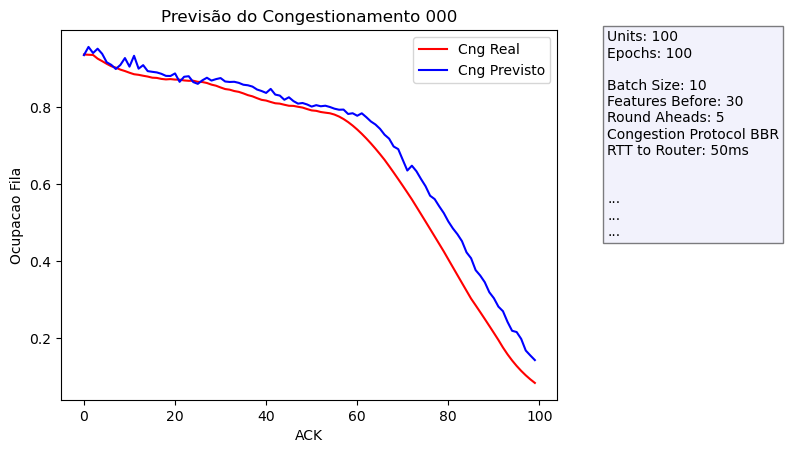

'./Exp_0000023/Wed_Jun__7_00_18_00_2023'

In [2]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila, **com 90/10%.\n"
description =description + "Modelo com 100 épocas em cada um dos *100 rounds**. \n"
description = description+ "Dados que participaram do treinamento por partes, e dados de treino como os da janela deslizante **sequencial**.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"
exp_dir = "./Exp_0000023/"
ofn.GeneralTraining(parExpDir="./Exp_0000023/",
                parPreviousTrainingExpDir=exp_dir,
                parTrainingPath="./Exp_0000023/training_client01.csv",
                parTestPath="./Exp_0000023/test_client01.csv",#fake
                parExpDescription=description,
                parSequencialTraining=False)

Os Resultados foram muito bons. Vamos fazer com 200. Posteriormente, vamos diminuir a quantidade de features inicial (talvez umas 50) e adaptar o sistema para pegar do arquivo, para agilizar o treinamento.

In [ ]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila, **com 90/10%.\n"
description =description + "Modelo com 100 épocas em cada um dos *300 rounds**. \n"
description = description+ "Dados que participaram do treinamento por partes, e dados de treino como os da janela deslizante **sequencial**.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"
exp_dir = "./Exp_0000024/"
ofn.GeneralTraining(parExpDir="./Exp_0000024/",
                parPreviousTrainingExpDir=exp_dir,
                parTrainingPath="./Exp_0000024/training_client01.csv",
                parTestPath="./Exp_0000024/test_client01.csv",#fake
                parExpDescription=description,
                parSequencialTraining=False)

Dados do Cliente:
client01_epoch =  100
numRounds =  300
##################Round  0  ##################################
304
9/9 [==============================] - 2s 21ms/step
##################Round  1  ##################################
305
9/9 [==============================] - 2s 22ms/step
##################Round  2  ##################################
306


# @@@FIM

Não ficou bom. Vamos tentar mais hounds

##################Round  0  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780
304
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (270, 30, 4)
9/9 [==============================] - 2s 57ms/step
[[0.6059487  0.6105413  0.61704636 0.6050767  0.60437566]
 [0.5961256  0.60079175 0.6066416  0.5953906  0.5954816 ]
 [0.59000266 0.5946483  0.59969455 0.5892637  0.59018534]
 ...
 [0.41539595 0.41712874 0.41884276 0.41700462 0.41789025]
 [0.41560814 0.41733474 0.4190228  0.4171974  0.41811693]
 [0.41658917 0.4183137  0.41998452 0.4181476  0.41912967]]
##################Round  1  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
304
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:

ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (270, 30, 4)
9/9 [==============================] - 2s 57ms/step
[[0.6191915  0.6188846  0.6184304  0.6189705  0.618568  ]
 [0.6124404  0.6120492  0.61164343 0.6120516  0.6116242 ]
 [0.61182654 0.611422   0.61102885 0.6114217  0.61100596]
 ...
 [0.02398716 0.02454987 0.02552412 0.02529385 0.02548883]
 [0.01983665 0.02049562 0.02145837 0.02103158 0.02146088]
 [0.0169413  0.01757081 0.01851513 0.01795106 0.01852382]]
##################Round  12  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
304
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (270, 30, 4)
9/9 [==============================] - 2s 58ms/step
[[0.6137657  0.6139571  0.6136742  0.613

ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (270, 30, 4)
9/9 [==============================] - 2s 63ms/step
[[0.6218019  0.6218686  0.6217926  0.6217437  0.6218682 ]
 [0.620854   0.62091124 0.62084156 0.62079203 0.62091404]
 [0.61990815 0.6199559  0.6198924  0.6198429  0.6199619 ]
 ...
 [0.01139438 0.01192487 0.01241674 0.01158006 0.01254897]
 [0.0113523  0.01188234 0.01238377 0.01152443 0.0125288 ]
 [0.01204923 0.01259159 0.01311694 0.01217156 0.01328653]]
##################Round  23  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
304
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (270, 30, 4)
9/9 [==============================] - 2s 60ms/step
[[0.6267626  0.6269542  0.6267925  0.626

ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (270, 30, 4)
9/9 [==============================] - 2s 68ms/step
[[0.5830395  0.5830529  0.5830681  0.5830457  0.58307356]
 [0.58287823 0.5828917  0.5829078  0.582885   0.5829136 ]
 [0.5826963  0.5827099  0.5827269  0.5827037  0.58273304]
 ...
 [0.01450869 0.01464294 0.01491581 0.01446274 0.01495159]
 [0.02042467 0.02054833 0.02076164 0.0203435  0.02077467]
 [0.6174137  0.617404   0.61745214 0.617415   0.6174488 ]]
##################Round  34  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
304
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
Observe os testadores
shape:  (270, 30, 4)
9/9 [==============================] - 2s 71ms/step
[[0.5747976  0.5748158  0.57482475 0.574

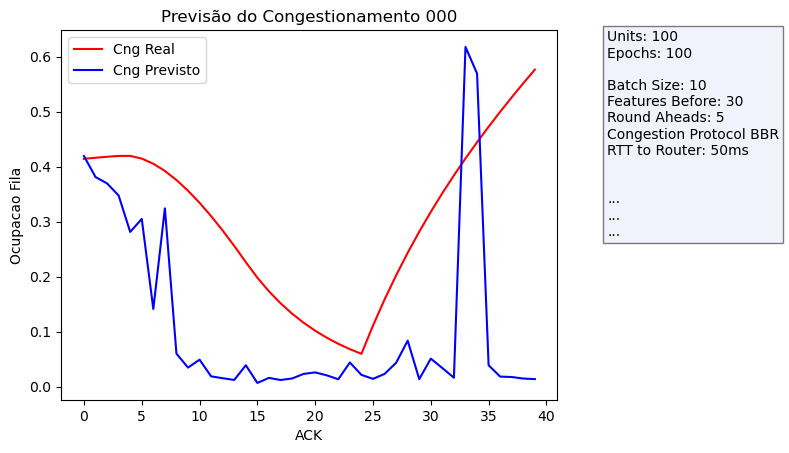

'./Exp_0000016/Thu_Jun__1_12_53_25_2023'

In [10]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila.\n"
description =description + "Modelo com 300 épocas em cada round\n"
description = description+ "Verificando a aderencia sobre um dos modelos concatenados\n"
description = description+ "Dados que não participaram do treinamento, mas gerados na mesma rede.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"
exp_dir = "./Exp_0000016/"
GeneralTraining(parExpDir="./Exp_0000016/",
                parPreviousTrainingExpDir=exp_dir,
                parTrainingPath="./Exp_0000016/training_client01.csv",
                parTestPath="./Exp_0000016/test_client01.csv",
                parExpDescription=description,
                parSequencialTraining=False)


Não ficou muito bom, vamos tentar aproximar o início dos dados, a cada round, das últimas features consideradas no treinamento.